<a href="https://colab.research.google.com/github/VenkataSuryaKamal/Stock_price_prediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv(r'NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [18]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
df.shape

(2816, 7)

In [20]:
df=df["Close"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler((0,1))
data=scaler.fit_transform(np.array(df).reshape([df.shape[0],1]))

In [22]:
time_step=100
def createData(data):
    x=[]
    y=[]
    for i in range(len(data)-time_step-1):
        x.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return x,y

In [23]:
x,y=createData(data)

In [24]:
x=np.array(x)
x=x.reshape(x.shape[0],x.shape[1],1)
y=np.array(y)

In [25]:
df.shape

(2816,)

In [26]:
xtrain,xtest,ytrain,ytest=x[:int(df.shape[0]*0.8)],x[int(df.shape[0]*0.8):],y[:int(df.shape[0]*0.8)],y[int(df.shape[0]*0.8):]

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [28]:
model=Sequential([
    LSTM(128,return_sequences=True,input_shape=xtrain[0].shape),
    LSTM(64,return_sequences=True),
    LSTM(32),
    Dense(16,activation="relu"),
    Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [29]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
71/71 [==============================] - 22s 230ms/step - loss: 0.0392 - root_mean_squared_error: 0.1980
Epoch 2/10
71/71 [==============================] - 18s 247ms/step - loss: 0.0048 - root_mean_squared_error: 0.0690
Epoch 3/10
71/71 [==============================] - 17s 237ms/step - loss: 0.0037 - root_mean_squared_error: 0.0611
Epoch 4/10
71/71 [==============================] - 16s 232ms/step - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 5/10
71/71 [==============================] - 16s 230ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582
Epoch 6/10
71/71 [==============================] - 16s 233ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553
Epoch 7/10
71/71 [==============================] - 18s 254ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552
Epoch 8/10
71/71 [==============================] - 17s 233ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 9/10
71/71 [==============================] - 16s 232ms/step - los

In [30]:
model.evaluate(xtest,ytest)

15/15 [==============================] - 2s 69ms/step - loss: 0.0044 - root_mean_squared_error: 0.0662


[0.004378756508231163, 0.06617217510938644]

In [31]:
trainPred=scaler.inverse_transform(model.predict(xtrain)).squeeze()
testPred=scaler.inverse_transform(model.predict(xtest)).squeeze()

15/15 [==============================] - 1s 69ms/step


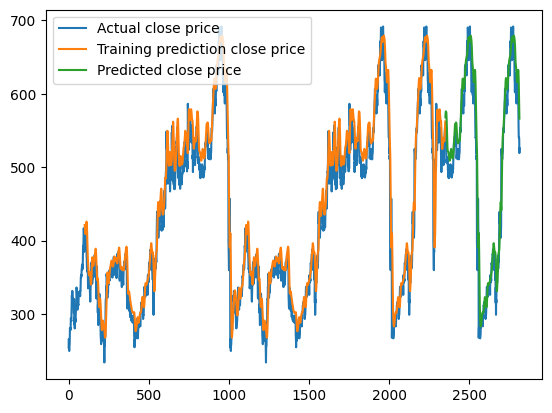

In [32]:
look_back=time_step
trainPredPlot=np.empty_like(df)
trainPredPlot[:]=np.nan
trainPredPlot[look_back:len(trainPred)+look_back]=trainPred
testPredPlot=np.empty_like(df)
testPredPlot[:]=np.nan
testPredPlot[len(trainPred)+look_back:len(trainPred)+look_back+len(testPred)]=testPred

plt.plot(df,label="Actual close price")
plt.plot(trainPredPlot,label="Training prediction close price")
plt.plot(testPredPlot,label="Predicted close price")
plt.legend()
plt.show()

In [33]:
input_data=np.array(df[-time_step:])
input_data=input_data.reshape([input_data.shape[0],1])

In [34]:
def predict(data,days=30):
    data=scaler.transform(data)
    predictions=[]
    i=1
    while(i<=days):
        nxtday=model.predict([data],verbose=0)
        predictions.append(scaler.inverse_transform(nxtday)[0])
        data[:-1]=data[1:]
        data[-1]=nxtday[0]
        i+=1
    return np.array(predictions).squeeze()

In [35]:
days=30
predictions=predict(input_data,days)

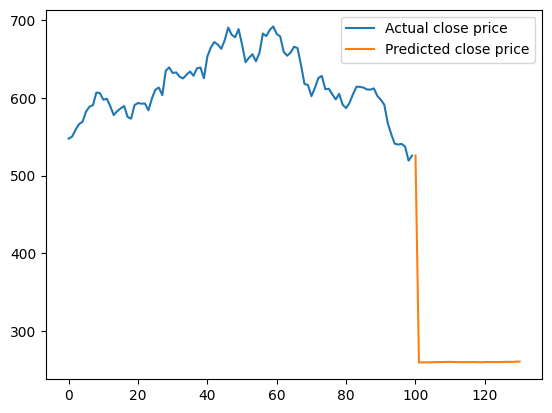

In [36]:
trainPredPlot=np.zeros(shape=[len(input_data)+1+days])
trainPredPlot[:]=np.nan
trainPredPlot[len(input_data)]=input_data[-1]
trainPredPlot[len(input_data)+1:]=predictions
df_=input_data
plt.plot(df_,label="Actual close price")
plt.plot(trainPredPlot,label="Predicted close price")
plt.legend()
plt.show()